## NPC Real Estate EDA
### By Victory Okechukwu

### Introduction

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading the dataset
df = pd.read_csv('Real_estate_clean.csv')

In [3]:
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


### Preliminary cleaning

In [4]:
df = df.drop(index=4163)
df = df.drop(index=df[df['Price'] > 4e+9].index)
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [5]:
df = df.drop(index=df[((df['Location'] == 'Katampe')| (df['Location'] == 'Jabi'))  & (df['Price'] > 1e+9)].index)
df = df.drop(index=df[(df['PropertyType'] == 'block of flats')].index).reset_index(drop=True)

In [6]:
locations = df['Location'].value_counts().to_frame()[df['Location']
            .value_counts().to_frame()['Location'] > 10].index.values.tolist()
df = df[df['Location'].isin(locations)]
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [7]:
df[df.duplicated()].shape

(46, 5)

In [8]:
df = df.drop_duplicates(ignore_index=True)

In [9]:
df[df.duplicated()].shape

(0, 5)

### Univariate Exploration

In [10]:
df['Price'].describe()

count    4.449000e+03
mean     2.520512e+08
std      3.691434e+08
min      6.000000e+06
25%      7.500000e+07
50%      1.250000e+08
75%      2.500000e+08
max      4.000000e+09
Name: Price, dtype: float64

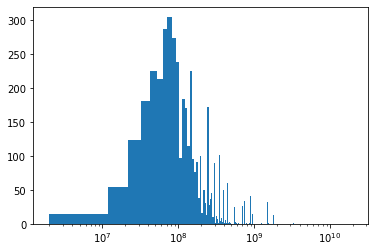

In [11]:
bins = np.arange(1.95e+6,2e+10,1e+7)
plt.hist(data=df, x='Price',bins=bins)
plt.xscale('log');

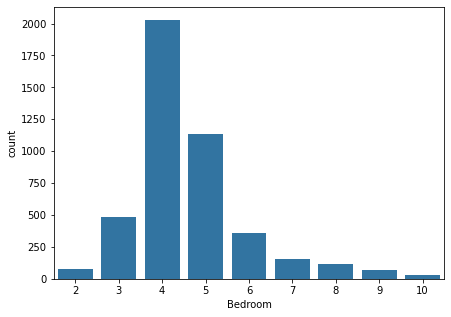

In [12]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.countplot(data=df, x='Bedroom',color=base_color);

In [13]:
def ploty(x):
    df[x].value_counts().head(10).plot(kind='barh')
    plt.title('Count of {}'.format(x))
    plt.xlabel('Count')
    plt.ylabel(x)
    plt.gca().invert_yaxis()

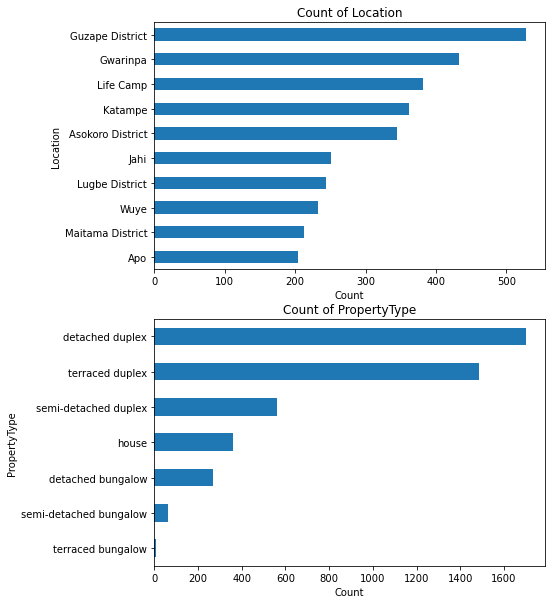

In [14]:
plt.figure(figsize=[7,10])
plt.subplot(2,1,1)
ploty(x='Location')
plt.subplot(2,1,2)
ploty(x='PropertyType')

### Bivariate Exploration

In [15]:
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [16]:
df.groupby('Location').mean().sort_values('Price',ascending=False).head(10)['Price']

Location
Maitama District    8.977358e+08
Asokoro District    6.946371e+08
Wuse 2              4.173296e+08
Utako               3.543182e+08
Guzape District     3.223803e+08
Katampe             2.974602e+08
Jabi                2.422901e+08
Gudu                2.313600e+08
Wuse                2.278846e+08
Mabushi             2.035280e+08
Name: Price, dtype: float64

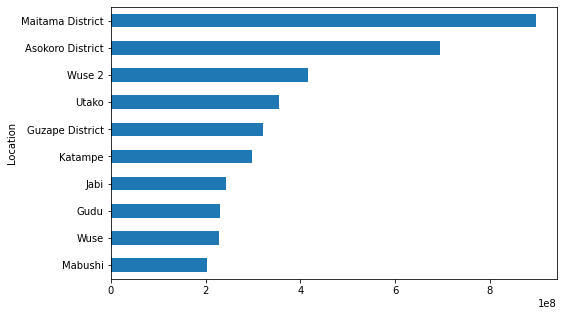

In [17]:
plt.figure(figsize=[8,5])
df.groupby('Location').mean().sort_values('Price',ascending=False).head(10)['Price'].plot(kind='barh')
plt.gca().invert_yaxis()

In [18]:
df.groupby(['Location','PropertyType']).mean().sort_values('Price',ascending=False)

Price   Bedroom
Location         PropertyType                                  
Maitama District detached duplex         1.121865e+09  6.880952
                 house                   1.031000e+09  6.695652
Asokoro District detached duplex         8.239928e+08  6.141509
                 house                   7.888812e+08  5.853659
Katampe          detached bungalow       7.250000e+08  6.000000
...                                               ...       ...
Kuje             detached bungalow       1.633333e+07  2.666667
                 house                   1.300000e+07  3.000000
Guzape District  detached bungalow       1.175000e+07  2.000000
Kuje             terraced bungalow       1.100000e+07  2.000000
                 semi-detached bungalow  9.600000e+06  2.000000

[173 rows x 2 columns]

### Multivariate Exploration